In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('spinny.csv')
df.head()

,full_name,selling_price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti SX4 Zxi BSIII,2.85,2007.0,Individual,110000,Petrol,Manual,15.00,1586.0,104.68,5.0
1,Hyundai i20 Sportz 1.4 CRDi,4.70,2012.0,Dealer,70000,Diesel,Manual,21.90,1396.0,88.76,5.0
2,Maruti Swift VDI BSIV,5.25,2015.0,Individual,70000,Diesel,Manual,25.20,1248.0,74.00,5.0
3,Honda City 1.3 EXI,1.25,2005.0,Individual,90000,Petrol,Manual,13.00,1343.0,90.00,5.0
4,Volkswagen Polo 1.2 MPI Comfortline,4.65,2015.0,Dealer,41000,Petrol,Manual,16.47,1198.0,74.00,5.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13986 entries, 0 to 13985
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   full_name          13986 non-null  object 
 1   selling_price      13986 non-null  float64
 2   year               13986 non-null  float64
 3   seller_type        13986 non-null  object 
 4   km_driven          13986 non-null  int64  
 5   fuel_type          13986 non-null  object 
 6   transmission_type  13986 non-null  object 
 7   mileage            13986 non-null  float64
 8   engine             13986 non-null  float64
 9   max_power          13986 non-null  float64
 10  seats              13986 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.2+ MB


In [ ]:
print(f'Total null count: {df.isnull().sum().sum()}')

Total null count: 0


In [ ]:
print(f'No.of.duplicates: {df.duplicated().sum()}')

No.of.duplicates: 61


In [ ]:
df.drop_duplicates(inplace=True)
print(f'No.of.duplicates after dropping: {df.duplicated().sum()}')

No.of.duplicates after dropping: 0


In [ ]:
df['year'] = df['year'].astype('int')
df['year'].head()

,year
0,2007
1,2012
2,2015
3,2005
4,2015


In [ ]:
df['seats'] = df['seats'].astype('int')
df['seats'].head()

,seats
0,5
1,5
2,5
3,5
4,5


In [ ]:
df.describe()

,selling_price,year,km_driven,mileage,engine,max_power,seats
count,1.392500e+04,13925.000000,1.392500e+04,13925.000000,13925.000000,13925.000000,13925.000000
mean,7.370823e+05,2014.513393,5.799660e+04,19.361114,1472.918178,97.621915,5.313106
std,9.370999e+05,3.257069,5.382499e+04,4.634897,517.227637,44.958909,0.831842
min,3.250000e+04,1991.000000,1.000000e+02,0.000000,0.000000,5.000000,2.000000
25%,3.400000e+05,2013.000000,3.100000e+04,16.900000,1197.000000,73.900000,5.000000
50%,5.100000e+05,2015.000000,5.123500e+04,19.160000,1248.000000,86.700000,5.000000
75%,7.800000e+05,2017.000000,7.400000e+04,22.320000,1582.000000,112.000000,5.000000
max,3.950000e+07,2021.000000,3.800000e+06,120.000000,6752.000000,626.000000,14.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13925 entries, 0 to 13985
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   full_name          13925 non-null  object 
 1   selling_price      13925 non-null  float64
 2   year               13925 non-null  int64  
 3   seller_type        13925 non-null  object 
 4   km_driven          13925 non-null  int64  
 5   fuel_type          13925 non-null  object 
 6   transmission_type  13925 non-null  object 
 7   mileage            13925 non-null  float64
 8   engine             13925 non-null  float64
 9   max_power          13925 non-null  float64
 10  seats              13925 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 1.3+ MB


In [ ]:
df.columns

Index(['full_name', 'selling_price', 'year', 'seller_type', 'km_driven',
       'fuel_type', 'transmission_type', 'mileage', 'engine', 'max_power',
       'seats'],
      dtype='object')

# EDA

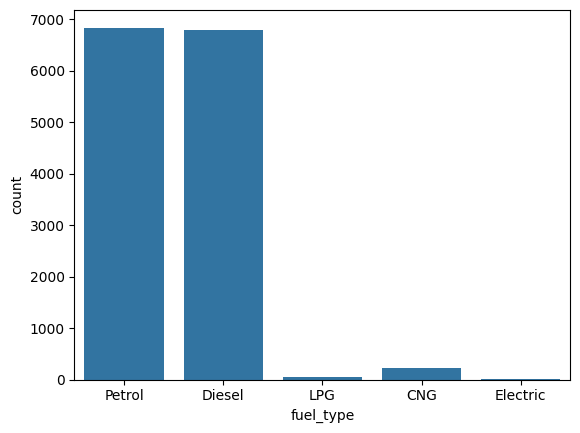

In [ ]:
sns.countplot(x = 'fuel_type', data = df)
plt.show()

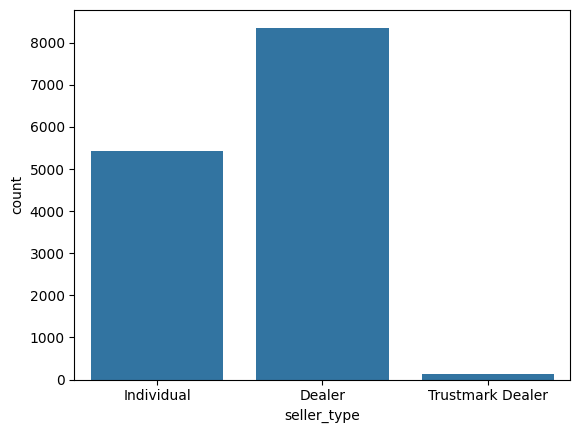

In [ ]:
sns.countplot(x = 'seller_type', data = df)
plt.show()

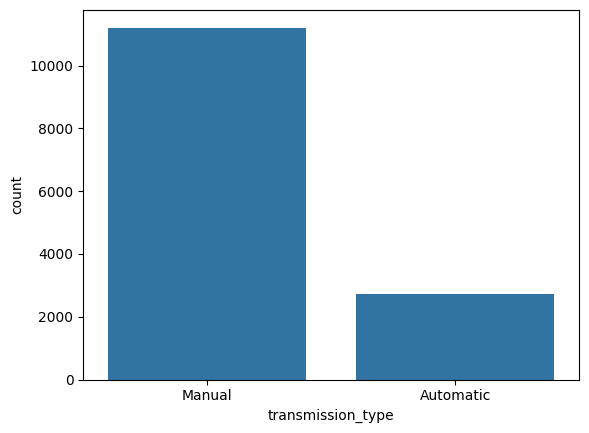

In [ ]:
sns.countplot(x = 'transmission_type', data = df)
plt.show()

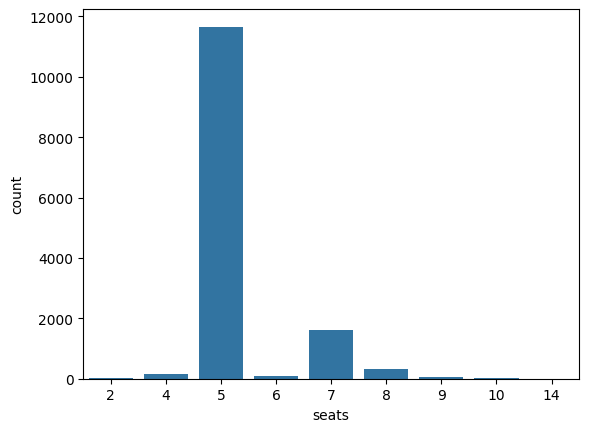

In [ ]:
sns.countplot(x='seats', data = df)
plt.show()

Observation:
1. **Fuel Type:** Petrol and Diesel vehicles dominate sales compared to other fuel types.
2. **Dealership Performance:** Dealers consistently outperform other sellers in car sales.
3. **Transmission Preference:** Manual transmission cars are sold more frequently than automatics.
4. **Seating Capacity:** Vehicles with a 5-seater configuration are the most popular among buyers.

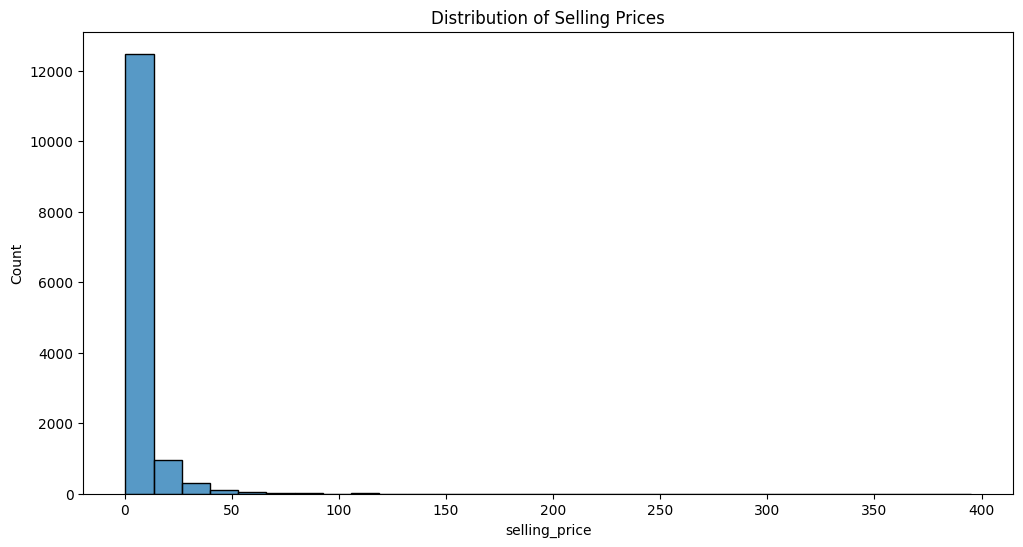

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='selling_price', bins=30)
plt.title('Distribution of Selling Prices')
plt.show()

Observation:
1. Most vehicles are sold at prices below ₹50 lakhs
2. Vehicles priced above ₹50 lakhs are rare

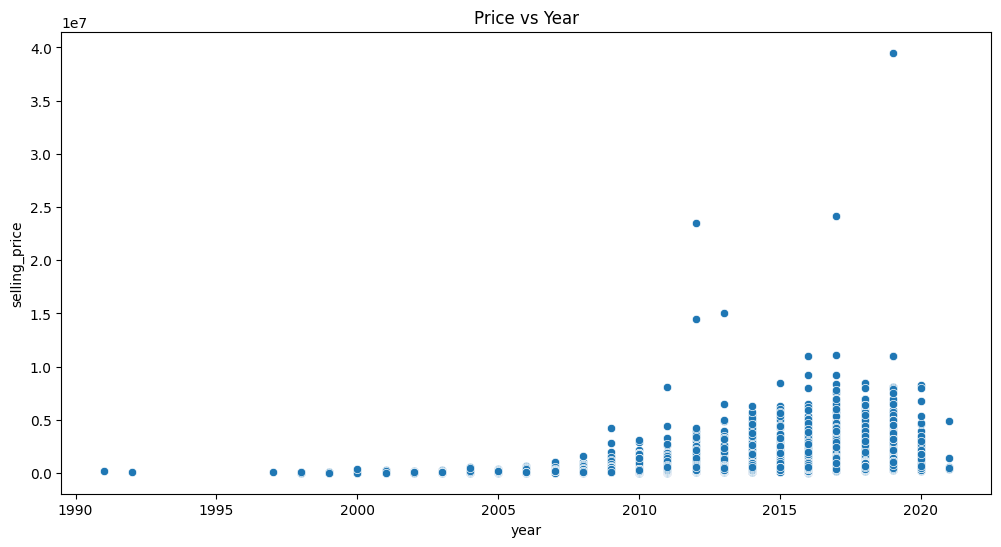

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='year', y='selling_price')
plt.title('Price vs Year')
plt.show()

Observation: Vehicle sales have seen a significant increase since 2010, indicating a growing demand in the market during this period.

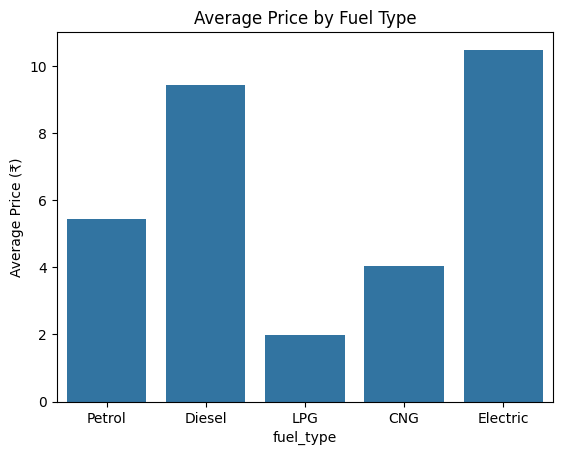

In [ ]:
sns.barplot(x = 'fuel_type', y = 'selling_price', data = df, ci = None)
plt.title('Average Price by Fuel Type')
plt.ylabel('Average Price (₹)')
plt.show()

Observation: The average price of Electric and Diesel vehicles is higher compared to other fuel types.

In [ ]:
df['price_range'] = pd.qcut(df['selling_price'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
df.head()

,full_name,selling_price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats,price_range
0,Maruti SX4 Zxi BSIII,2.85,2007,Individual,110000,Petrol,Manual,15.00,1586.0,104.68,5,Very Low
1,Hyundai i20 Sportz 1.4 CRDi,4.70,2012,Dealer,70000,Diesel,Manual,21.90,1396.0,88.76,5,Medium
2,Maruti Swift VDI BSIV,5.25,2015,Individual,70000,Diesel,Manual,25.20,1248.0,74.00,5,Medium
3,Honda City 1.3 EXI,1.25,2005,Individual,90000,Petrol,Manual,13.00,1343.0,90.00,5,Very Low
4,Volkswagen Polo 1.2 MPI Comfortline,4.65,2015,Dealer,41000,Petrol,Manual,16.47,1198.0,74.00,5,Medium


In [ ]:
price_range_by_fuel = pd.crosstab(df['fuel_type'], df['price_range'])
price_range_by_fuel

price_range,Very Low,Low,Medium,High,Very High
fuel_type,,,,,
CNG,69,103,31,27,3
Diesel,712,969,1423,1556,2132
Electric,0,3,0,2,6
LPG,46,3,0,0,0
Petrol,2085,1581,1523,1038,613


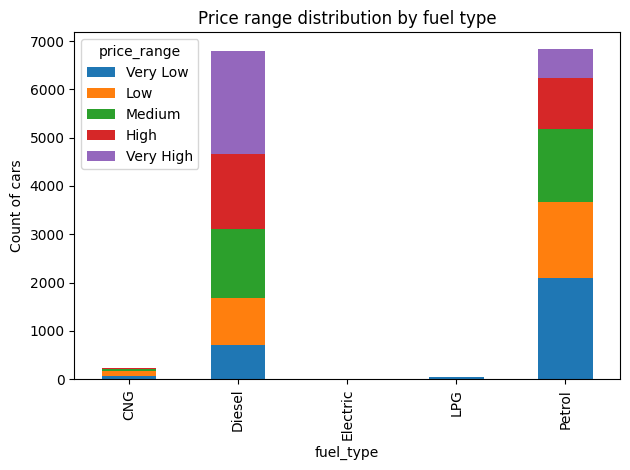

In [ ]:
price_range_by_fuel.plot(kind='bar', stacked = True)
plt.title('Price range distribution by fuel type')
plt.ylabel('Count of cars')
plt.tight_layout()
plt.show()

Observation:
1. Most diesel vehicles fall in the range from high to very high.

2. Most petrol vehicles fall in the range from very low to low.

3. Petrol vehicles are generally more affordable than diesel vehicles.

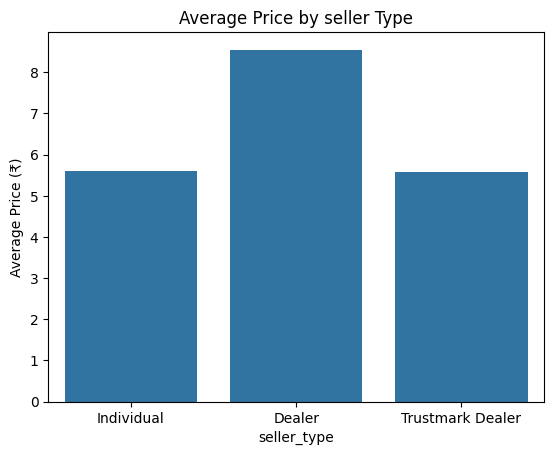

In [ ]:
sns.barplot(x = 'seller_type', y = 'selling_price', data = df, ci = None)
plt.title('Average Price by seller Type')
plt.ylabel('Average Price (₹)')
plt.show()

Observation:
1. The average price of a dealer is higher compared to others.
2. The average price of individual and trustmark dealers remains approximately the same to each other.

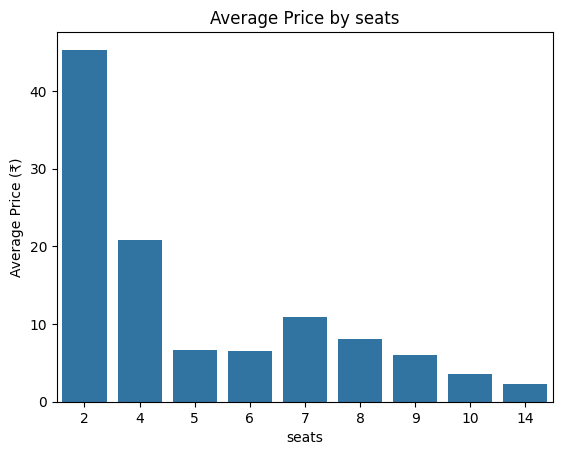

In [ ]:
sns.barplot(data = df, x = 'seats', y = 'selling_price', ci = None)
plt.title('Average Price by seats')
plt.ylabel('Average Price (₹)')
plt.show()

Observation: 2-seaters average prices are higher compared to others.

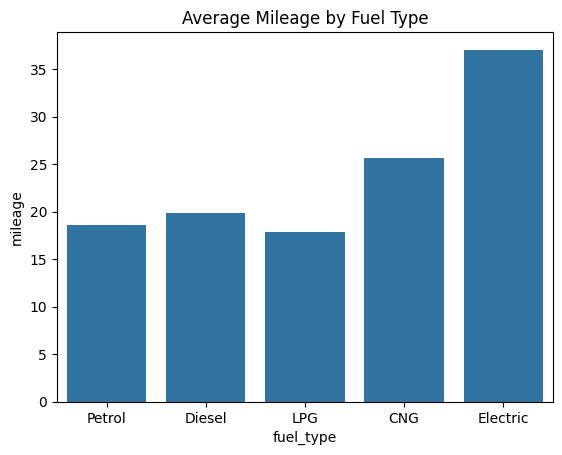

In [ ]:
sns.barplot(data=df, x='fuel_type', y='mileage', ci= None)
plt.title('Average Mileage by Fuel Type')
plt.show()

Observation:
1. Electric and CNG vehicles are the most fuel-efficient, followed by LPG and diesel vehicles.
2. Petrol vehicles are less fuel-efficient compared to these options.

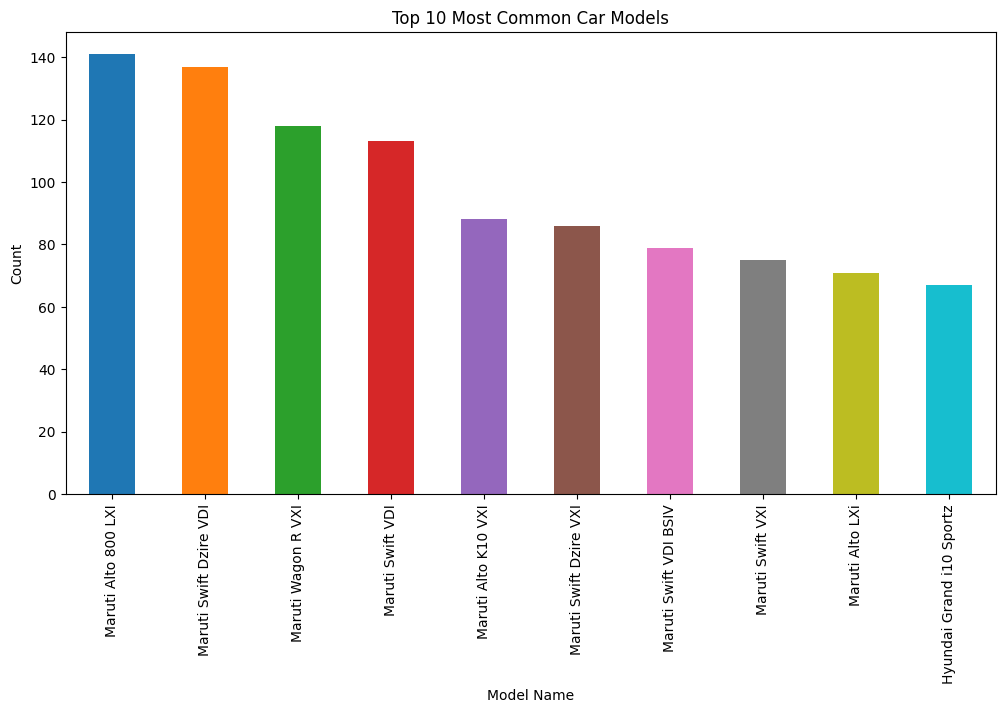

In [ ]:
plt.figure(figsize=(12, 6))
df['full_name'].value_counts().head(10).plot(kind='bar',
                                             color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
plt.title('Top 10 Most Common Car Models')
plt.xlabel('Model Name')
plt.ylabel('Count')
plt.show()

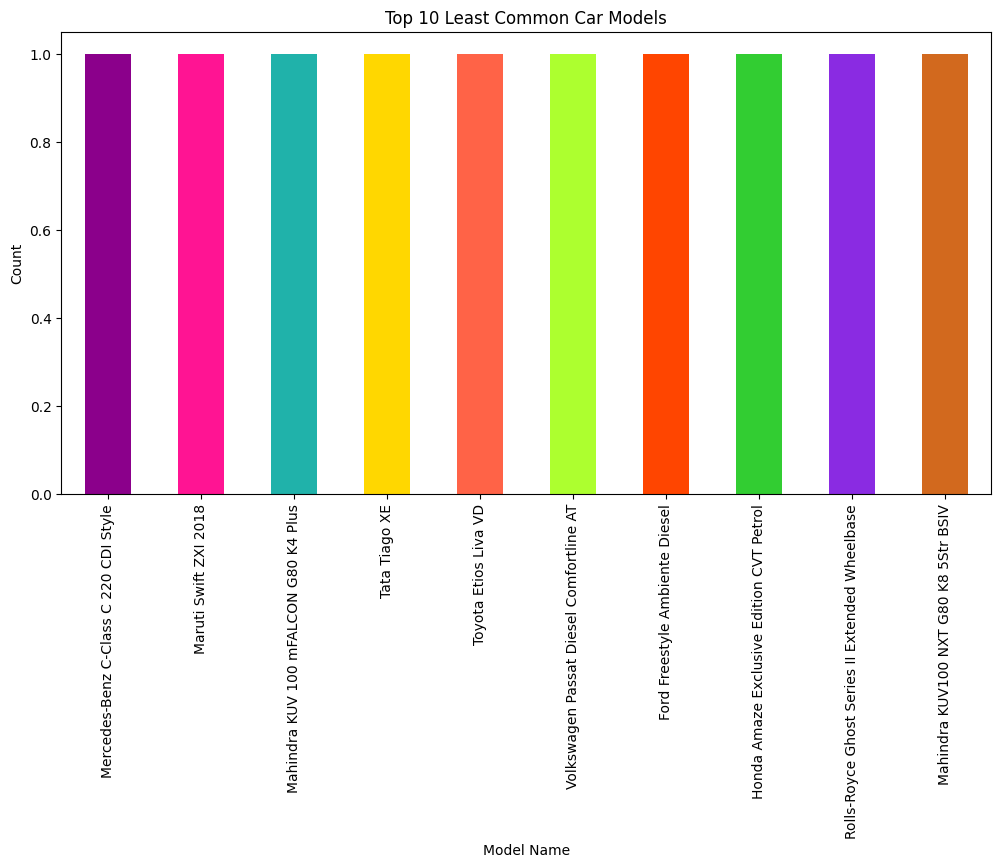

In [ ]:
plt.figure(figsize=(12, 6))
df['full_name'].value_counts().tail(10).plot(kind='bar',
                                             color = ['#8B008B', '#FF1493', '#20B2AA', '#FFD700', '#FF6347',
           '#ADFF2F', '#FF4500', '#32CD32', '#8A2BE2', '#D2691E'])
plt.title('Top 10 Least Common Car Models')
plt.xlabel('Model Name')
plt.ylabel('Count')
plt.show()

Observation:
 1. Top 10 most common models mostly come from Maruti Suzuki.
 2. The least used models in the dataset prominently include entries from Mahindra, along with other brands.

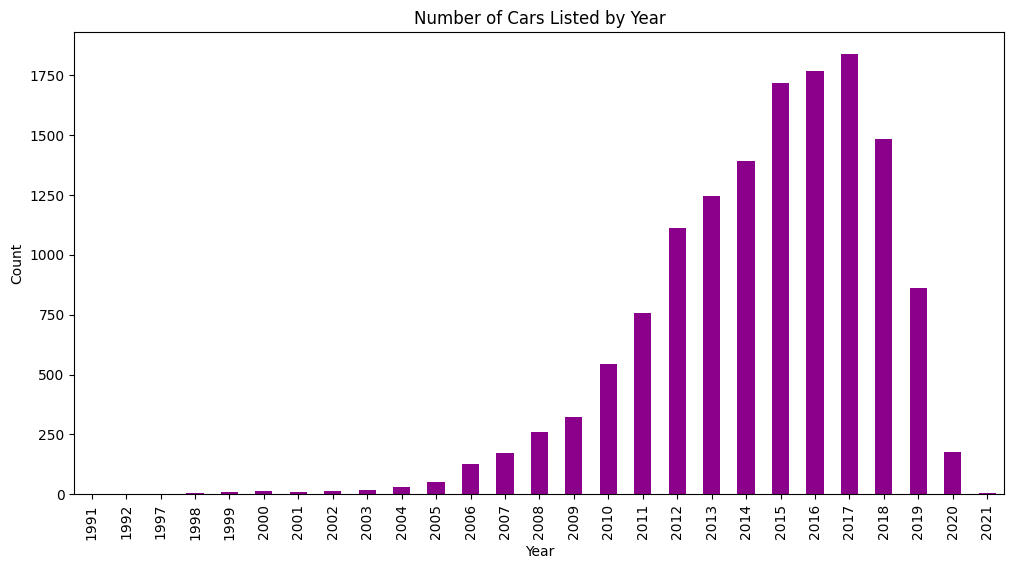

In [ ]:
plt.figure(figsize=(12, 6))
df['year'].value_counts().sort_index().plot(kind='bar', color='#8B008B')
plt.title('Number of Cars Listed by Year')
plt.ylabel('Count')
plt.xlabel('Year')
plt.show()

Observation:
1. The period from 2010 to 2017 experienced the highest growth and peak in sales.

2. The post-2017 years show a significant decline.

3. Due to the pandemic, there was a significant decline in car sales in 2020 and 2021.

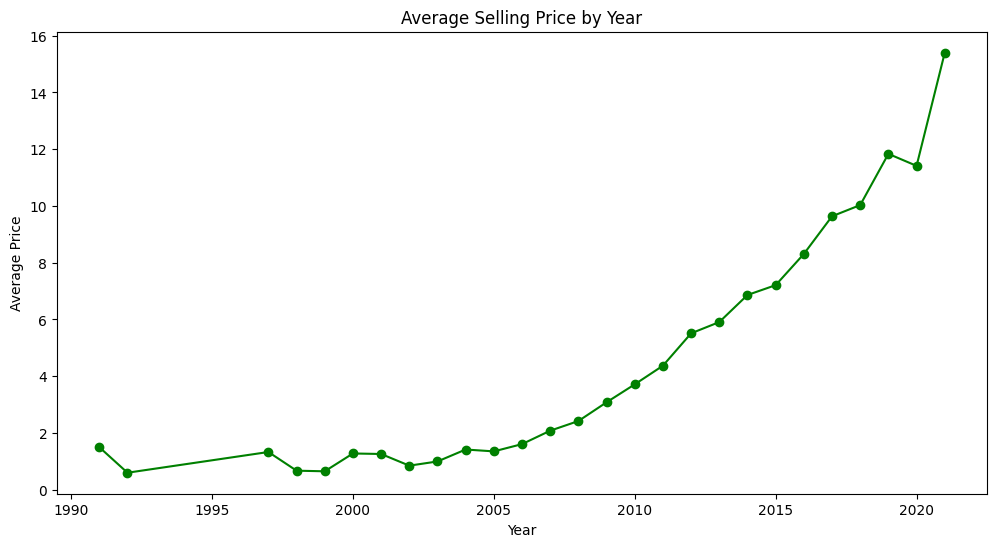

In [ ]:
plt.figure(figsize=(12, 6))
df.groupby('year')['selling_price'].mean().plot(kind='line', marker='o', color='green')
plt.title('Average Selling Price by Year')
plt.ylabel('Average Price')
plt.xlabel('Year')
plt.show()

Observation: Average selling prices have increased over the years, reflecting market trends.

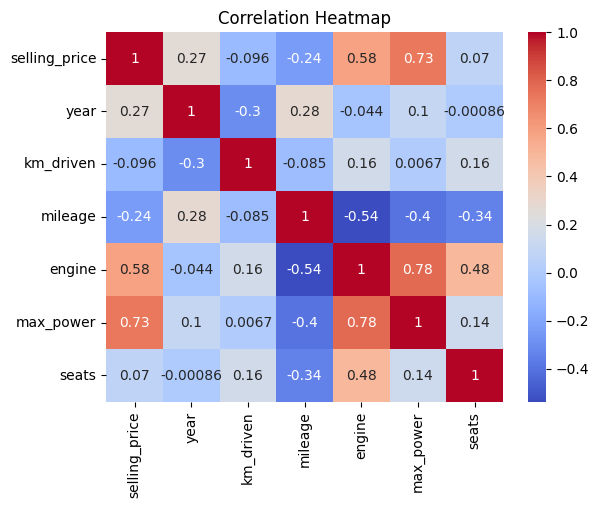

In [ ]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Observation:


*   There is a strong positive correlation between Max Power and Engine size with the selling price.
*   Both Mileage and Kilometers driven show a negative correlation with the selling price

